In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display


In [3]:
from utils import *
#from algorithms import *
from MonteCarlo_Algorithm import mcts

Agent position: (6, 1)
Target position: (10, 14)


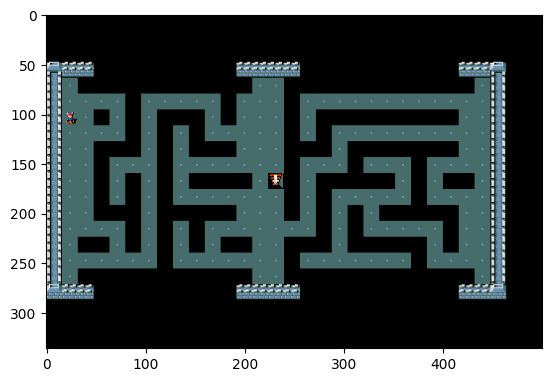

In [13]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
SEED = 8
env.seed(SEED)
state = env.reset()

coordinates = [500, 500]

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

# path = bfs(game_map, start, target)
path = mcts(game_map, start, target, iterations=2000)

actions = actions_from_path(start, path[1:])


image = plt.imshow(game[:coordinates[0], :coordinates[1]])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` say to us when the simulation is over
    image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])
    
    
    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if hp == 0: 
            display_game_over()
            break  # Interrupt the smulation

        # Else you have won    
        display_victory()
        break  # Interrupt the smulation


    # Update the game visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)

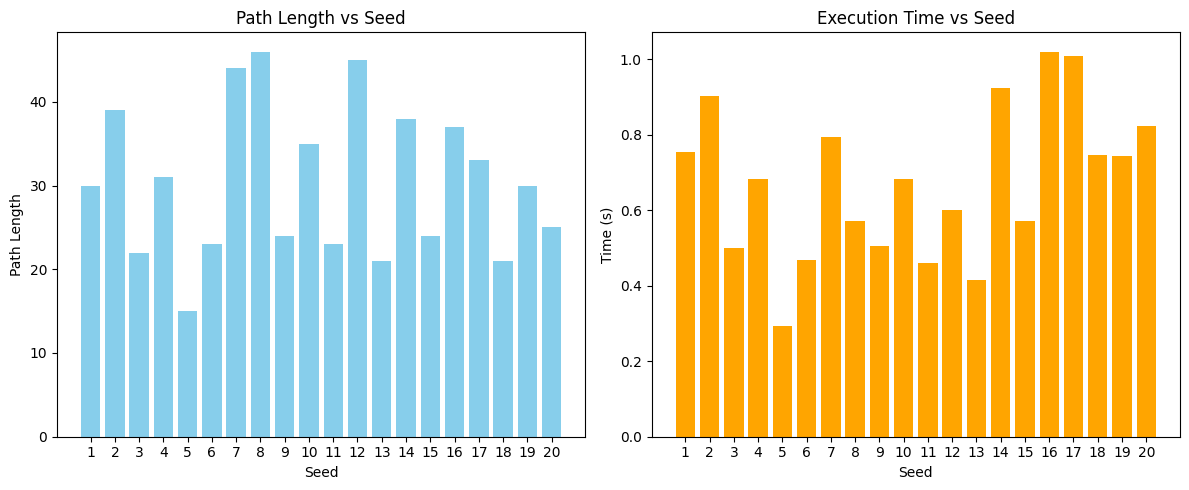

In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
from utils import get_player_location, get_target_location, actions_from_path
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))

def analyze_seed_performance(env, seed_range, iterations, exploration_factor):
    performance_results = []
    
    for seed in seed_range:
        # Inizializza l'ambiente con il seed corrente
        env.seed(seed)
        state = env.reset()
        game_map = state['chars']
        
        # Ottieni posizione iniziale e target
        start = get_player_location(game_map)
        target = get_target_location(game_map)
        
        # Misura il tempo di esecuzione dell'MCTS
        start_time = time.time()
        path = mcts(game_map, start, target, iterations=iterations, exploration_factor=exploration_factor)
        elapsed_time = time.time() - start_time
        
        # Calcola metriche di performance
        path_length = len(path) if path else 0
        reached_target = path[-1] == target if path else False
        final_distance = (
            abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1]) 
            if path else float('inf')
        )
        
        # Log per i seed problematici
        if not path or not reached_target:
            print(f"Seed {seed}: Target not reached or no valid path found.")
        
        # Memorizza i risultati
        performance_results.append({
            'seed': seed,
            'path_length': path_length,
            'elapsed_time': elapsed_time
        })
        
    return performance_results

def plot_seed_performance(results):
    # Estrai i dati dai risultati
    seeds = [res['seed'] for res in results]
    path_lengths = [res['path_length'] for res in results]
    times = [res['elapsed_time'] for res in results]
    
    # Visualizza i risultati
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne
    
    # Lunghezza del percorso vs Seed
    axs[0].bar(seeds, path_lengths, color='skyblue')  # Usa axs[0]
    axs[0].set_title('Path Length vs Seed')
    axs[0].set_xlabel('Seed')
    axs[0].set_ylabel('Path Length')
    axs[0].set_xticks(range(1, len(seeds) + 1))  # Configura asse x
    
    # Tempo di esecuzione vs Seed
    axs[1].bar(seeds, times, color='orange')  # Usa axs[1]
    axs[1].set_title('Execution Time vs Seed')
    axs[1].set_xlabel('Seed')
    axs[1].set_ylabel('Time (s)')
    axs[1].set_xticks(range(1, len(seeds) + 1))  # Configura asse x
    
    plt.tight_layout()
    plt.show()

# Simulazione delle performance sui primi 20 seed
seed_range = range(1, 21)
iterations = 2000
exploration_factor = 0.3

# Supponendo che `env` sia già inizializzato come nel codice precedente
performance_results = analyze_seed_performance(env, seed_range, iterations, exploration_factor)
plot_seed_performance(performance_results)
